# Lead Scoring Case Study
### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [518]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [470]:
df = pd.read_csv('leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [471]:
df.shape

(9240, 37)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [473]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [474]:
(df.isnull().sum().sort_values(ascending=False) *100)/9240

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [475]:
#dropping columns with more than 40% of values missing.
missing_vals = (df.isnull().sum().sort_values(ascending=False) *100)/9240
miss = missing_vals[missing_vals>40].index

In [476]:
df = df.drop(miss, axis=1)

In [477]:
df.shape

(9240, 32)

In [478]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [479]:
df.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [480]:
(df.isnull().sum().sort_values(ascending=False) *100)/9240

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [481]:
df.drop(['City'],axis=1,inplace=True)
df.drop(['Country'],axis=1,inplace=True)

In [482]:
df.shape

(9240, 30)

In [483]:
for col in df:
    print('******************************************************')
    print(df[col].astype('category').value_counts())

******************************************************
Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
******************************************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
******************************************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  

In [484]:
df.drop(['Through Recommendations'],axis=1,inplace=True)
df.drop(['Do Not Call'],axis=1,inplace=True)
df.drop(['Receive More Updates About Our Courses'],axis=1,inplace=True)
df.drop(['Get updates on DM Content'],axis=1,inplace=True)
df.drop(['Lead Profile'],axis=1,inplace=True)

In [485]:
df.drop(['Update me on Supply Chain Content'],axis=1,inplace=True)

In [486]:
df.shape

(9240, 24)

In [487]:
df.drop(['How did you hear about X Education'],axis=1,inplace=True)
df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [488]:
df.drop(['Newspaper','I agree to pay the amount through cheque','Digital Advertisement','X Education Forums','Newspaper Article','Magazine','Search'],axis=1,inplace=True)

In [489]:
df.shape

(9240, 15)

In [490]:
for col in df:
    print('******************************************************')
    print(df[col].astype('category').value_counts())

******************************************************
Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
******************************************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
******************************************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  

In [491]:
(df.isnull().sum().sort_values(ascending=False) *100)/9240

Tags                                      36.287879
What is your current occupation           29.112554
Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [492]:
#due to multiple categories in this column, we'll be creating new category "unknown" as we can't simply use the mode here.
df['Tags'] = df['Tags'].fillna('Unknown')

In [493]:
#as the data in this column is already very heavily biased towards one category,we'll just fill the missing values with the mode.
mode_value = df['What is your current occupation'].mode()[0]
df['What is your current occupation'] = df['What is your current occupation'].fillna(mode_value)


In [494]:
(df.isnull().sum().sort_values(ascending=False) *100)/9240

Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
What is your current occupation            0.000000
Tags                                       0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [495]:
df["Specialization"] = df["Specialization"].fillna("Unknown")

In [496]:
(df.isnull().sum().sort_values(ascending=False) *100)/9240

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Lead Source                               0.389610
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [497]:
#as the percentage of missing values is very low, we'll just remove them.
df = df.dropna()

In [498]:
(df.isnull().sum().sort_values(ascending=False) *100)/9240

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [499]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,No,Modified


In [500]:
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [501]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,No,Modified


In [502]:
#converting the columns with yes-no values into binary values.

# Define the columns to convert
columns_to_convert = ['Do Not Email',
                      'A free copy of Mastering The Interview']

# Convert columns with yes-no values into binary values (0 or 1)
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


In [503]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,0,Modified


In [504]:
#categorical columns

df1=df.loc[:,df.dtypes=='object']
df1.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [505]:
dummy=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity']],dtype=int)

In [506]:
df=pd.concat([df,dummy],axis=1)

In [507]:
dummy.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [508]:
df.shape

(9074, 124)

In [509]:
df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'], axis=1, inplace=True)

In [510]:
df.shape

(9074, 117)

In [511]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [512]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.

In [513]:
# Checking for outliers in the continuous variables
cont = df[['Total Time Spent on Website','Page Views Per Visit']]
cont.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000
mean,482.887481,2.370151
std,545.256560,2.160871
min,0.000000,0.000000
25%,11.000000,1.000000
50%,246.000000,2.000000
75%,922.750000,3.200000
90%,1373.000000,5.000000
95%,1557.000000,6.000000
99%,1839.000000,9.000000


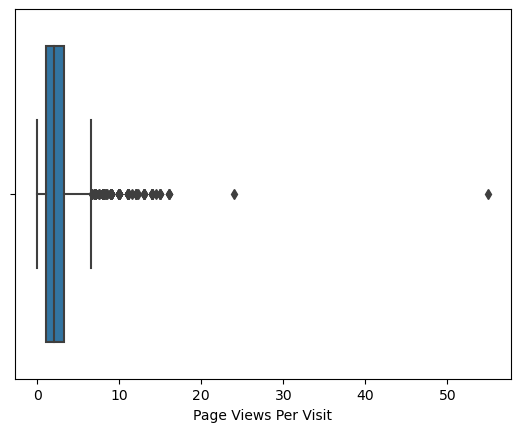

In [515]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

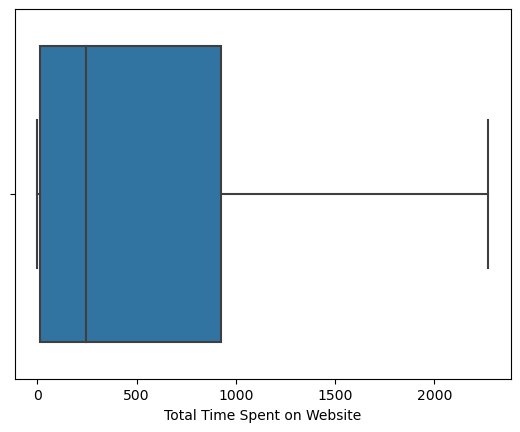

In [516]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

In [407]:
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [408]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].astype(int)
df['TotalVisits'] = df['TotalVisits'].astype(int)

In [409]:
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
2     2234
0     2161
3     1360
1     1212
4      956
5      547
6      260
7      135
8       89
9       45
10      25
11      19
14      10
13       6
12       6
15       4
16       3
55       1
24       1
Name: count, dtype: int64

In [410]:
# as we can see there is one instance where we have the value 55.this value is the outlier.
#we will delete this value.

df = df[df['Page Views Per Visit'] != 55]

In [411]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

### checking for correlation

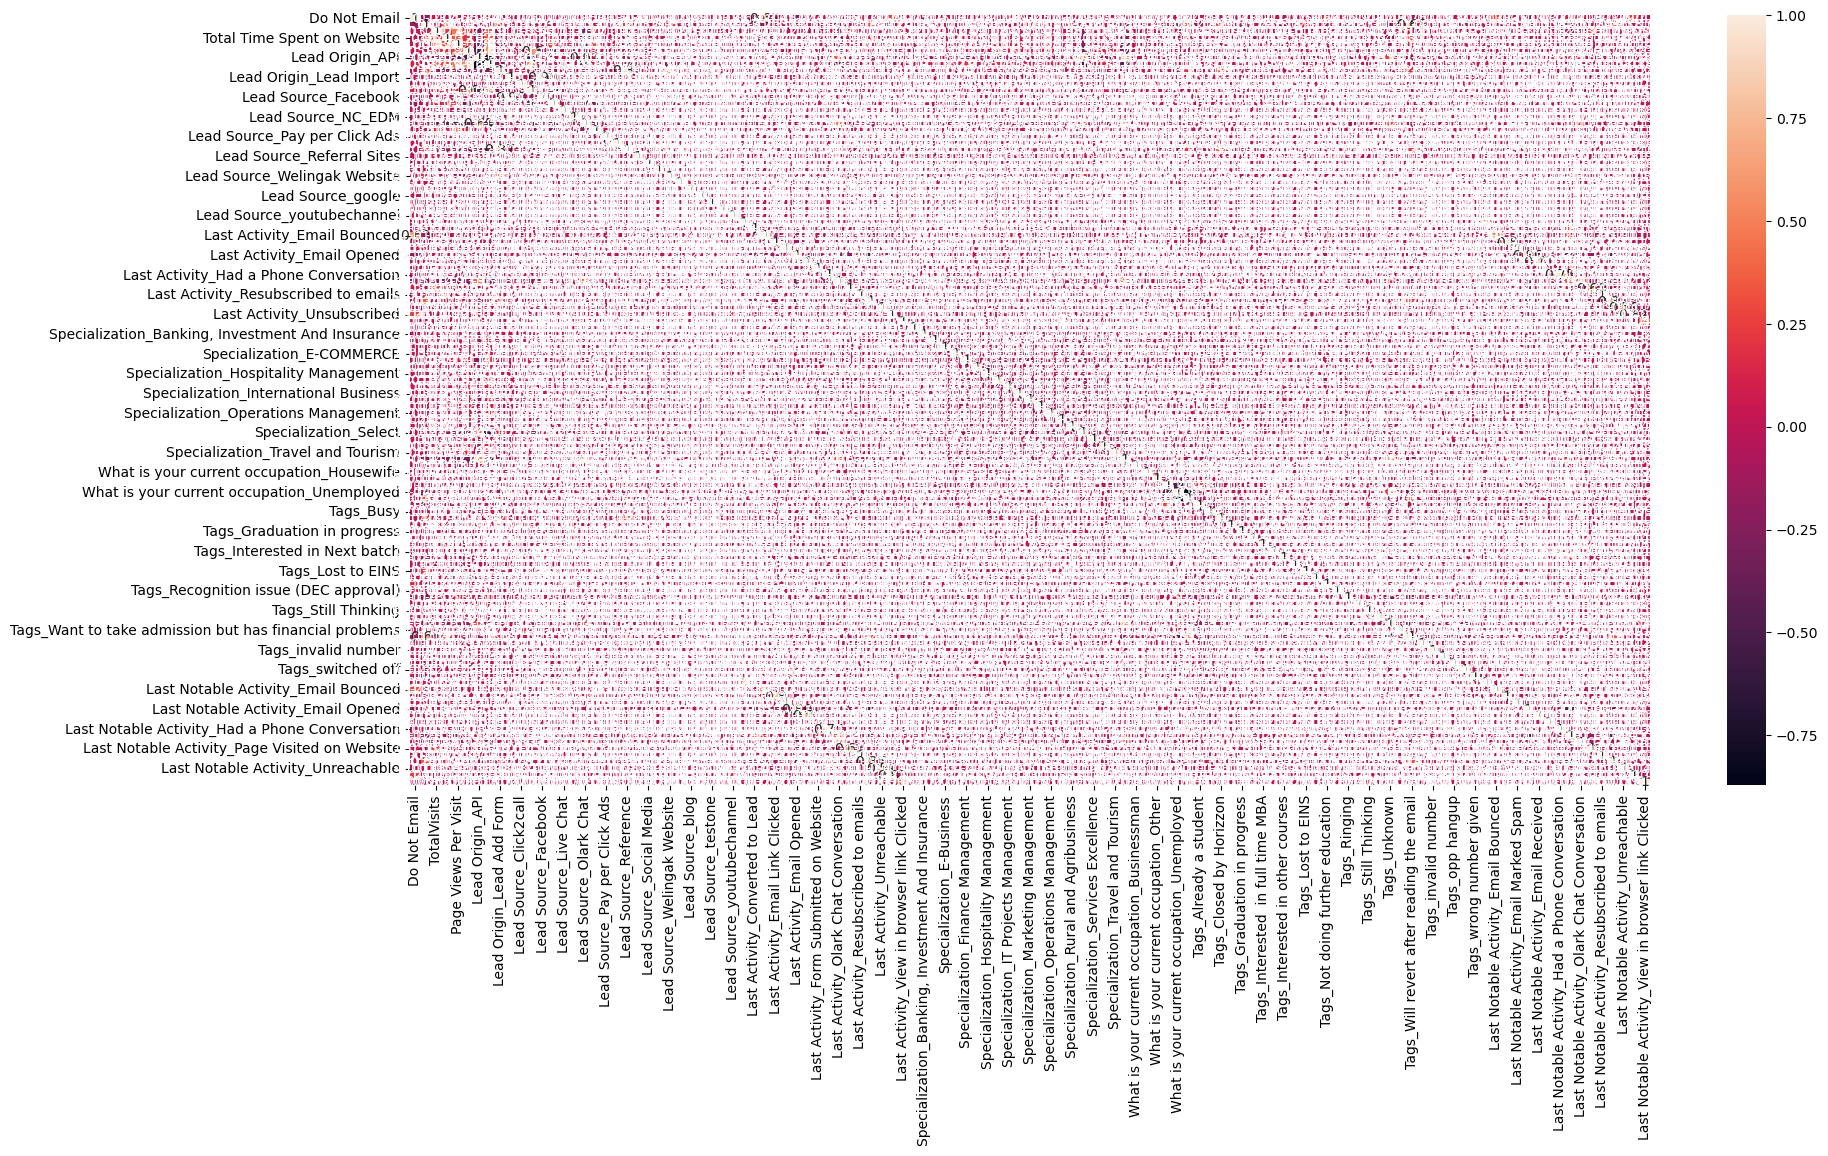

In [412]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [413]:
df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.140587,0.031939,-0.046094,0.029721,0.057516,-0.083674,0.099381,-0.031390,-0.016846,-0.006143,0.111746,-0.017126,-0.071276,-0.004343,-0.003071,-0.050920,0.035677,-0.003071,0.050767,-0.035896,-0.010004,-0.004343,-0.003071,0.002882,-0.007524,-0.003071,0.010562,-0.003071,-0.003071,0.035896,-0.006868,-0.063150,0.620513,-0.043668,0.050767,-0.220546,-0.004343,-0.

### Model Building

##### Test-Train Split

In [414]:
X = df.drop('Converted', axis=1)
y = df['Converted']

In [415]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [416]:
scaler=MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [417]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7113,0,0.026087,0.272887,0.0625,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4749,0,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [418]:
import statsmodels.api as sm

In [419]:
# Building our first model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                          104
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 15 Aug 2023   Deviance:                       71104.
Time:                        08:02:28   Pearson chi2:                 3.48e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   4.937e+13   1.32e+07   3.75e+06      0.000    4.94e+13    4.94e+13
Do Not Email                                           -3.674e+14   4.59e+06  -8.01e+07      0.000   -3.67e+14   -3.67e+14
TotalVisits                                             9.566e+14   3.36e+07   2.84e+07      0.000    9.57e+14    9.57e+14
Total Time Spent on Website                             1.441e+15   4.32e+06   3.33e+08      0.000    1.44e+15    1.44e+15
Page Views Per Visit                                   -2.347e+14   9.81e+06  -2.39e+07      0.000   -2.35e+14   -2.35e+14
A free copy of Mastering The Interview                 -2.386e+10   2.69e+06  -8854.575      0.000   -2.39e+10   -2.39e+10
Lead Origin_API                                        -7.213e+14   1.94e+07  -3.73e+07      0.000   -7.21e+14   -7.21e+14
Lead Origin_Landing Page Submission                    -1.007e+15   1.93e+07  -5.21e+07      0.000   -1.01e+15   -1.01e+15
Lead Origin_Lead Add Form                              -1.299e+15   3.93e+07  -3.31e+07      0.000    -1.3e+15    -1.3e+15
Lead Origin_Lead Import                                 3.077e+15   5.53e+07   5.57e+07      0.000    3.08e+15    3.08e+15
Lead Source_Click2call                                  1.368e+15    5.5e+07   2.49e+07      0.000    1.37e+15    1.37e+15
Lead Source_Direct Traffic                              5.179e+14   1.44e+07   3.61e+07      0.000    5.18e+14    5.18e+14
Lead Source_Facebook                                   -3.149e+15   6.54e+07  -4.81e+07      0.000   -3.15e+15   -3.15e+15
Lead Source_Google                                      6.558e+14   1.43e+07   4.59e+07      0.000    6.56e+14    6.56e+14
Lead Source_Live Chat                                   4.226e+15   6.01e+07   7.04e+07      0.000    4.23e+15    4.23e+15
Lead Source_NC_EDM                                      4.579e+15   6.54e+07      7e+07      0.000    4.58e+15    4.58e+15
Lead Source_Olark Chat                                  9.555e+14   1.44e+07   6.66e+07      0.000    9.55e+14    9.55e+14
Lead Source_Organic Search                              6.588e+14   1.44e+07   4.56e+07      0.000    6.59e+14    6.59e+14
Lead Source_Pay per Click Ads                          -2.144e+15   6.55e+07  -3.28e+07      0.000   -2.14e+15   -2.14e+15
Lead Source_Press_Release                              -2.608e+15   4.79e+07  -5.44e+07      0.000   -2.61e+15   -2.61e+15
Lead Source_Reference                                   1.159e+15   3.97e+07   2.92e+07      0.000    1.16e+15    1.16e+15
Lead Source_Referral Sites                              5.764e+14   1.59e+07   3.63e+07      0.000    5.76e+14    5.76e+14
Lead Sou

##### Feature Selection Using RFE

In [420]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [421]:
#from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [422]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [423]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 88),
 ('Lead Origin_API', False, 51),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', False, 13),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Click2call', False, 78),
 ('Lead Source_Direct Traffic', False, 46),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 70),
 ('Lead Source_Live Chat', False, 99),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', False, 72),
 ('Lead Source_Pay per Click Ads', False, 97),
 ('Lead Source_Press_Release', False, 77),
 ('Lead Source_Reference', False, 52),
 ('Lead Source_Referral Sites', False, 58),
 ('Lead Source_Social Media', False, 64),
 ('Lead Source_WeLearn', False, 102),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', 

In [424]:
col = X_train.columns[rfe.support_]

In [425]:
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Specialization_Unknown',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [426]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=101)

In [427]:
# Building our 2nd model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1397.2
Date:                Tue, 15 Aug 2023   Deviance:                       2794.4
Time:                        08:02:49   Pearson chi2:                 6.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5887
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3670      0.097    -24.408      0.000      -2.557      -2.177
Total Time Spent on Website                  3.1995      0.209     15.307      0.000       2.790       3.609
Lead Source_Welingak Website                 4.8328      0.735      6.575      0.000       3.392       6.273
Last Activity_SMS Sent                       1.9603      0.105     18.674      0.000       1.755       2.166
Specialization_Unknown                      -0.7307      0.135     -5.426      0.000      -0.995      -0.467
Tags_Already a student                      -3.5361      0.716     -4.942      0.000      -4.939      -2.134
Tags_Closed by Horizzon                      6.3143      0.718      8.799      0.000       4.908       7.721
Tags_Diploma holder (Not Eligible)          -2.8680      1.047     -2.739      0.006      -4.920      -0.816
Tags_Interested in other courses            -2.3161      0.356     -6.501      0.000      -3.014      -1.618
Tags_Lost to EINS                            5.0393      0.597      8.448      0.000       3.870       6.208
Tags_Not doing further education            -3.2752      1.017     -3.221      0.001      -5.268      -1.282
Tags_Ringing                                -3.0944      0.220    -14.092      0.000      -3.525      -2.664
Tags_Will revert after reading the email     4.4998      0.181     24.904      0.000       4.146       4.854
Tags_invalid number                         -3.6992      1.061     -3.487      0.000      -5.778      -1.620
Tags_switched off                           -3.7211      0.599     -6.213      0.000      -4.895      -2.547
Tags_wrong number given                    -23.1281   1.37e+04     -0.002      0.999   -2.69e+04    2.69e+04
============================================================================================================
"""

In [428]:
col = ['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Specialization_Unknown',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off']

In [429]:
#building our third model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1410.1
Date:                Tue, 15 Aug 2023   Deviance:                       2820.1
Time:                        08:02:51   Pearson chi2:                 6.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5870
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3892      0.097    -24.659      0.000      -2.579      -2.199
Total Time Spent on Website                  3.1863      0.208     15.342      0.000       2.779       3.593
Lead Source_Welingak Website                 4.8604      0.735      6.615      0.000       3.420       6.301
Last Activity_SMS Sent                       1.9380      0.104     18.587      0.000       1.734       2.142
Specialization_Unknown                      -0.6983      0.134     -5.197      0.000      -0.962      -0.435
Tags_Already a student                      -3.5072      0.715     -4.902      0.000      -4.909      -2.105
Tags_Closed by Horizzon                      6.3382      0.718      8.832      0.000       4.932       7.745
Tags_Diploma holder (Not Eligible)          -2.8315      1.046     -2.707      0.007      -4.882      -0.781
Tags_Interested in other courses            -2.2841      0.356     -6.418      0.000      -2.982      -1.587
Tags_Lost to EINS                            5.0618      0.596      8.488      0.000       3.893       6.231
Tags_Not doing further education            -3.2432      1.017     -3.190      0.001      -5.236      -1.251
Tags_Ringing                                -3.0502      0.219    -13.923      0.000      -3.480      -2.621
Tags_Will revert after reading the email     4.5280      0.181     25.079      0.000       4.174       4.882
Tags_invalid number                         -3.6531      1.060     -3.447      0.001      -5.730      -1.576
Tags_switched off                           -3.6761      0.599     -6.141      0.000      -4.849      -2.503
============================================================================================================
"""

In [430]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7113    0.992941
4749    0.084003
7986    0.084003
1281    0.995751
7346    0.995557
8087    0.894625
6710    0.983346
1248    0.197515
1429    0.358283
2178    0.265493
dtype: float64

In [431]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99294137, 0.08400303, 0.08400303, 0.9957514 , 0.99555725,
       0.89462455, 0.98334605, 0.19751525, 0.35828329, 0.26549273])

In [432]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,LeadID
0,1,0.992941,7113
1,0,0.084003,4749
2,0,0.084003,7986
3,1,0.995751,1281
4,1,0.995557,7346


In [433]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,LeadID,predicted
0,1,0.992941,7113,1
1,0,0.084003,4749,0
2,0,0.084003,7986,0
3,1,0.995751,1281,1
4,1,0.995557,7346,1


In [434]:
from sklearn import metrics

In [521]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print("Confusion matrix: ")
print(confusion)
print(" ")
print("ACCURACY: ")
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))


Confusion matrix: 
[[3778  158]
 [ 397 2018]]
 
ACCURACY: 
0.9126121870571563


In [436]:
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.9126121870571563


#### Checking VIFs

In [437]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [438]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.69
11,Tags_Will revert after reading the email,1.56
2,Last Activity_SMS Sent,1.51
10,Tags_Ringing,1.13
5,Tags_Closed by Horizzon,1.04
8,Tags_Lost to EINS,1.04
1,Lead Source_Welingak Website,1.03
3,Specialization_Unknown,1.03
13,Tags_switched off,1.03
4,Tags_Already a student,1.02


In [439]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate Positive Predictive Value (Precision)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Display the results
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value (NPV):", npv)

Sensitivity (Recall): 0.8356107660455486
Specificity: 0.9598577235772358
False Positive Rate (FPR): 0.04014227642276423
Positive Predictive Value (Precision): 0.9273897058823529
Negative Predictive Value (NPV): 0.9049101796407185


#### Plotting the ROC Curve

In [440]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [441]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conv, y_train_pred_final.Conv_Prob, drop_intermediate = False )

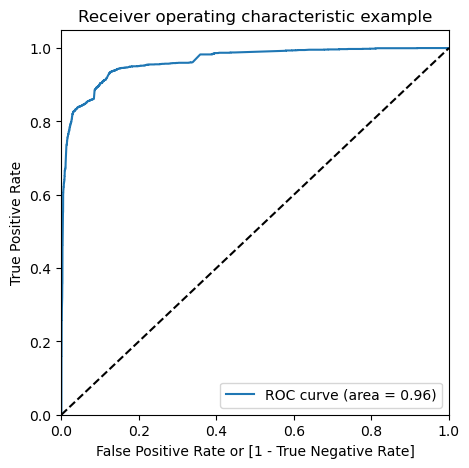

In [442]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

In [443]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.992941,7113,1,1,1,1,1,1,1,1,1,1,1
1,0,0.084003,4749,0,1,0,0,0,0,0,0,0,0,0
2,0,0.084003,7986,0,1,0,0,0,0,0,0,0,0,0
3,1,0.995751,1281,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995557,7346,1,1,1,1,1,1,1,1,1,1,1


In [444]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380255  1.000000  0.000000
0.1   0.1  0.813415  0.957350  0.725102
0.2   0.2  0.893403  0.937888  0.866108
0.3   0.3  0.901118  0.903934  0.899390
0.4   0.4  0.898599  0.858799  0.923018
0.5   0.5  0.912612  0.835611  0.959858
0.6   0.6  0.913242  0.818219  0.971545
0.7   0.7  0.906944  0.794617  0.975864
0.8   0.8  0.897969  0.759006  0.983232
0.9   0.9  0.870886  0.677847  0.989329


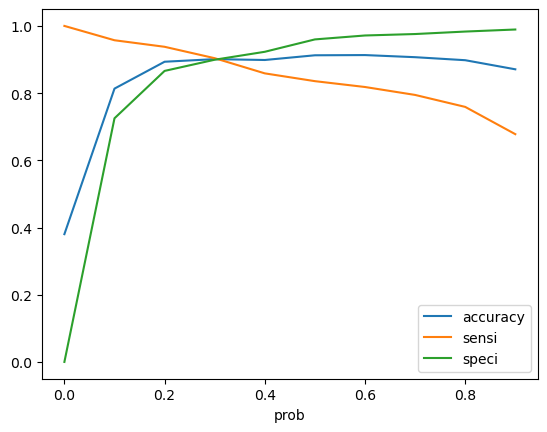

In [445]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [446]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Conv,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.992941,7113,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.084003,4749,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.084003,7986,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.995751,1281,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995557,7346,1,1,1,1,1,1,1,1,1,1,1,1


In [447]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.9011179341835931

In [448]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion2

array([[3540,  396],
       [ 232, 2183]], dtype=int64)

In [522]:
# Confusion matrix 
print("Confusion matrix: ")
print(confusion2)
print(" ")
print("ACCURACY: ")
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted))


Confusion matrix: 
[[3540  396]
 [ 232 2183]]
 
ACCURACY: 
0.9011179341835931


In [449]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TN = confusion2[0, 0]
FP = confusion2[0, 1]
FN = confusion2[1, 0]
TP = confusion2[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate Positive Predictive Value (Precision)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Display the results
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value (NPV):", npv)

Sensitivity (Recall): 0.9039337474120083
Specificity: 0.899390243902439
False Positive Rate (FPR): 0.10060975609756098
Positive Predictive Value (Precision): 0.8464521132221792
Negative Predictive Value (NPV): 0.9384941675503712


#### Precision and recall 

In [450]:
from sklearn.metrics import precision_score, recall_score

In [451]:
precision_score(y_train_pred_final.Conv, y_train_pred_final.predicted)

0.9273897058823529

In [452]:
recall_score(y_train_pred_final.Conv, y_train_pred_final.predicted)

0.8356107660455486

In [453]:
from sklearn.metrics import precision_recall_curve

In [454]:
y_train_pred_final.Conv, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Conv, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [455]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

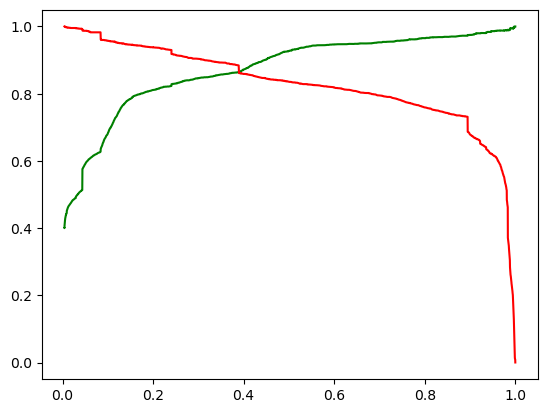

In [456]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [457]:
scaler=MinMaxScaler()
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [458]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Specialization_Unknown,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
4703,0.038615,0,1,0,0,0,0,0,0,0,0,1,0,0
5544,0.639592,0,0,0,0,0,0,0,0,0,0,0,0,0
5520,0.026631,0,0,0,0,0,0,0,0,0,0,0,0,0
1342,0.018642,0,0,0,0,0,0,0,0,0,1,0,0,0
4101,0.085220,0,0,1,0,0,0,0,0,0,0,0,0,0


In [459]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4703    0.985225
5544    0.413090
5520    0.090767
1342    0.004587
4101    0.056469
569     0.455224
7011    0.043627
3433    0.043627
8800    0.091118
2429    0.034718
dtype: float64

In [460]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4703,0.985225
5544,0.413090
5520,0.090767
1342,0.004587
4101,0.056469


In [461]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4703,0.985225
1,0,5544,0.413090
2,0,5520,0.090767
3,1,1342,0.004587
4,0,4101,0.056469


In [462]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
#y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conv_Prob'], axis=1)
y_pred_final.head()

,Converted,LeadID,Conv_Prob
0,1,4703,0.985225
1,0,5544,0.413090
2,0,5520,0.090767
3,1,1342,0.004587
4,0,4101,0.056469


In [463]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,LeadID,Conv_Prob,final_predicted
0,1,4703,0.985225,1
1,0,5544,0.413090,0
2,0,5520,0.090767,0
3,1,1342,0.004587,0
4,0,4101,0.056469,0


In [464]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9008082292432035

In [465]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1579,  123],
       [ 147,  873]], dtype=int64)

In [466]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TN = confusion3[0, 0]
FP = confusion3[0, 1]
FN = confusion3[1, 0]
TP = confusion3[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate Positive Predictive Value (Precision)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Display the results
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value (NPV):", npv)

Sensitivity (Recall): 0.8558823529411764
Specificity: 0.9277320799059929
False Positive Rate (FPR): 0.07226792009400705
Positive Predictive Value (Precision): 0.8765060240963856
Negative Predictive Value (NPV): 0.9148319814600232


In [523]:
# Confusion matrix 
print("Confusion matrix: ")
print(confusion3)
print(" ")
print("ACCURACY: ")
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))


Confusion matrix: 
[[1579  123]
 [ 147  873]]
 
ACCURACY: 
0.9008082292432035
